In [4]:
import os
import numpy as np
import pandas as pd
import torch
import os.path as osp
import json
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
from tqdm import tqdm
import glob
import pickle
IMG_DIR = '/home/chicm_dev/data/open-images/train/imgs'
TEST_IMG_DIR = '/home/chicm_dev/data/open-images/test'
MASK_DIR = '/home/chicm_dev/data/open-images/masks/train'
DATA_DIR = '/home/chicm_dev/data/open-images/segmentation'

In [5]:
!ls $DATA_DIR

challenge-2019-classes-description-segmentable.csv
challenge-2019-train-segmentation-bbox.csv
challenge-2019-train-segmentation-labels.csv
challenge-2019-train-segmentation-masks.csv
challenge-2019-validation-segmentation-bbox.csv
challenge-2019-validation-segmentation-labels.csv
challenge-2019-validation-segmentation-masks.csv
merge_0903_1.csv
sample_empty_submission-Copy1.csv
sample_empty_submission.csv
sample_empty_submission.csv.zip
sample_truncated_submission.csv
top_classes.csv
top_classes_level1.csv
top_classes_parent.csv


In [6]:
df_des = pd.read_csv(osp.join(DATA_DIR, 'challenge-2019-classes-description-segmentable.csv'), names=['class', 'name'])
class_dict = df_des.set_index('class').to_dict()['name']

In [53]:
df_test = pd.read_csv(osp.join(DATA_DIR, 'sample_empty_submission.csv'))
df_test.head()

,ImageID,ImageWidth,ImageHeight,PredictionString
0,80155d58d0ee19bd,-1,-1,NaN
1,52a76f3fe21185bf,-1,-1,NaN
2,65e9da7c04c8e4cd,-1,-1,NaN
3,6d10fa21d93bd6cc,-1,-1,NaN
4,0841dee573a875ca,-1,-1,NaN


In [54]:
def get_top_classes(start_index, end_index):
    df = pd.read_csv('top_classes_parent.csv')
    c = df['class'].values[start_index:end_index]
    #print(df.head())
    stoi = { c[i]: i for i in range(len(c)) }
    return c, stoi

In [55]:
classes, stoi = get_top_classes(0, 26)

In [56]:
classes[:5]

array(['/m/0k4j', '/m/01g317', '/m/0c9ph5', '/m/0138tl', '/m/06msq'],
      dtype=object)

In [80]:
!ls /home/chicm_dev/open-images-seg/work_dirs/parent_cascade_mask_rcnn_x101_64x4d_fpn_1x

20190902_102517.log	  20190902_235431.log.json  20190905_020557.log.json
20190902_102517.log.json  20190903_012224.log	    20190905_025623.log
20190902_114742.log	  20190903_012224.log.json  20190905_025623.log.json
20190902_114742.log.json  20190904_175910.log	    20190905_042626.log
20190902_151119.log	  20190904_180046.log	    20190905_042626.log.json
20190902_151119.log.json  20190904_180219.log	    20190905_093033.log
20190902_174625.log	  20190904_181911.log	    20190905_093033.log.json
20190902_174625.log.json  20190904_182845.log	    20190905_104827.log
20190902_182951.log	  20190904_184903.log	    epoch_1.pth
20190902_182951.log.json  20190904_184903.log.json  latest.pth
20190902_192714.log	  20190904_190116.log	    preds_0902_1000.pkl
20190902_192714.log.json  20190904_190116.log.json  preds_0903_1.pkl
20190902_222416.log	  20190904_235327.log	    preds_1000_0905.pkl
20190902_222416.log.json  20190904_235327.log.json  preds_5000_0905.pkl
20190902_235431.log	  20190905_020557.

In [51]:
with open('/home/chicm_dev/open-images-seg/work_dirs/parent_cascade_mask_rcnn_x101_64x4d_fpn_1x/preds_5000_0905.pkl', 'rb') as f:
    preds = pickle.load(f)

In [52]:
len(preds)

5000

In [13]:
len(preds[0][0])

26

In [14]:
preds[0][0]

[array([[2.6425684e+02, 1.7714752e+02, 7.4067200e+02, 5.5905182e+02,
         1.0417939e-02]], dtype=float32),
 array([[2.6245770e+02, 1.7873457e+02, 7.3756366e+02, 5.5768787e+02,
         2.7837469e-03]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.6455719e+02, 1.7762628e+02, 7.4065277e+02, 5.5954614e+02,
         9.4232678e-01],
        [3.9606427e+02, 4.5422632e+02, 7.0947968e+02, 5.6509406e+02,
         5.3194086e-03]], dtype=float32),
 array([[2.6245770e+02, 1.7873457e+02, 7.3756366e+02, 5.5768787e+02,
         4.8881355e-03]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.6334958e+02, 1.7700116e+02, 7.4073065e+02, 5.5967102e+02,
         8.7282490e-03]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.6392978e+02, 1.7895062e+02, 7.3925092e+02, 5.5637378e+02,
         4.8193652e-03]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=floa

In [15]:
preds[0][1]

[[{'size': [683, 1024],
   'counts': b'l[`5[2Pc0000000000000000O2M3N3L4K5L5I7I8H8H6M2N2N2N1O2N2O0O2N2N1O2N2N3L3L6K4L3M4M2M3N2N2N2O1N2N2N1O2N2N1O2N1O2M2O2N1O2N1O2O0O101N2O001N2N3N1N101N2N1O2N1O2O0O1O2O0O2O000O2O1O001N2O1O1O1N2O1O001O001O00000O2O000000001O0000001O0000001N101O001O1N2O1O1O1N2O1O0O2O001N101O0O2O001N2O001N2O1O2M2O1O2N1N2O1O1O1O1O2M2O1O1O1O2N1O1N2O2N1O1O1O1O001O001O001O001O1O0O2O1O1O1O1O001O1O1O1O001O001O001O001O001O001O00001O00001O001O1O001O1O0O2O001O001O00001O0000001O0000001O000000001O0000001O00001O001O001O001O1O1O001O1O001O0000001O00001O0000001O00001O0000001O01O01O00001O001O001O7I00000000000000000001O00000000000000000000001O00001O001O001O1O1O1O1O001O1O00001O00000000001O0000000000001O0I700O101O0O101N101O001N2O1O1N2O1O001O0O2O00001O0O10001O000O101O000O101O000O2O1N101N2O1N3M2O1N2O0O2O1N101O0O101O1O001N2O1O1O3M2M3N2N1O2N1O1N2O1O1O1N2O1N3N2M3N3L6K3L5K2N2N2O1N2O0O2O1O0O2O2N1N3N1O2M2O1O1N2O001N101N101N2N1O2N2M4L3L4L4J6B>J5L5K4O2N101N1O2N2N2M3N2M3L5J6K5K4L4M3L4M3M2000000000000000m

In [16]:
import pycocotools.mask as mutils

In [17]:
mask1 = mutils.decode(preds[0][1][1][0])

In [18]:
mask1.shape

(683, 1024)

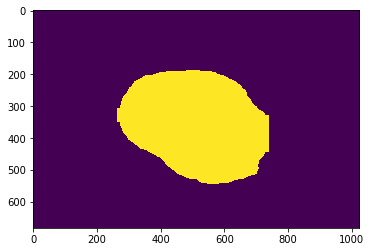

In [19]:
plt.imshow(mask1)

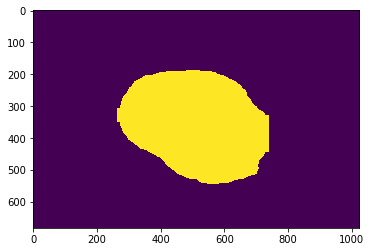

In [21]:
plt.imshow(mutils.decode(preds[0][1][1][0]))

In [22]:
# all root '/m/0bl9f'

with open('challenge-2019-label300-segmentable-hierarchy.json', 'r') as f:
    h = json.load(f)

leaf_classes = []
parent_classes = []
parent_dict = {}

def travel(root, parent=[]):
    if 'Subcategory' in root:
        parent_classes.append(root['LabelName'])
        for c in root['Subcategory']:
            travel(c, parent+[root['LabelName']])
    else:
        leaf_classes.append(root['LabelName'])
        parent_dict[root['LabelName']] = parent

travel(h)

FileNotFoundError: [Errno 2] No such file or directory: 'challenge-2019-label300-segmentable-hierarchy.json'

In [23]:
parent_dict['/m/029b3']

NameError: name 'parent_dict' is not defined

In [57]:
def get_mask(idx):
    box_pred, mask_pred = preds[idx]
    masks, labels, confs = [], [], []
    for i in range(len(classes)):
        for encoded_mask, bbox in zip(mask_pred[i], box_pred[i]):
            if True: #bbox[4] > 0.01:
                mask = mutils.decode(encoded_mask)
                masks.append(mask)
                labels.append(classes[i])
                confs.append(bbox[4])
                
                # add parent
                #for parent_class in parent_dict[classes[i]]:
                #    if parent_class != '/m/0bl9f':
                #        masks.append(mask)
                #        labels.append(classes[i])
                #        confs.append(bbox[4])
                
    return masks, labels, confs

In [58]:
def show_pred(idx):
    row = df_test.iloc[idx]
    fn = TEST_IMG_DIR + '/' + row.ImageID + '.jpg'
    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    masks, labels, confs = get_mask(idx)
    
    columns = 4
    plt.figure(figsize=(20, 15))
    
    plt.subplot(len(masks) / columns + 1, columns, 1)
    plt.imshow(img)
    plt.title(str(img.shape))
    
    for i, mask in enumerate(masks):
        plt.subplot(len(masks) / columns + 1, columns, i+2)
        if labels is not None:
            plt.title(class_dict[labels[i]] + str(mask.shape)+','+str(confs[i]))
        plt.imshow(mask)

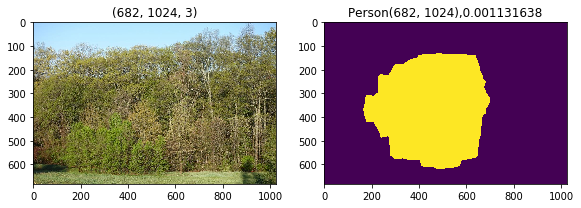

In [26]:
show_pred(2)

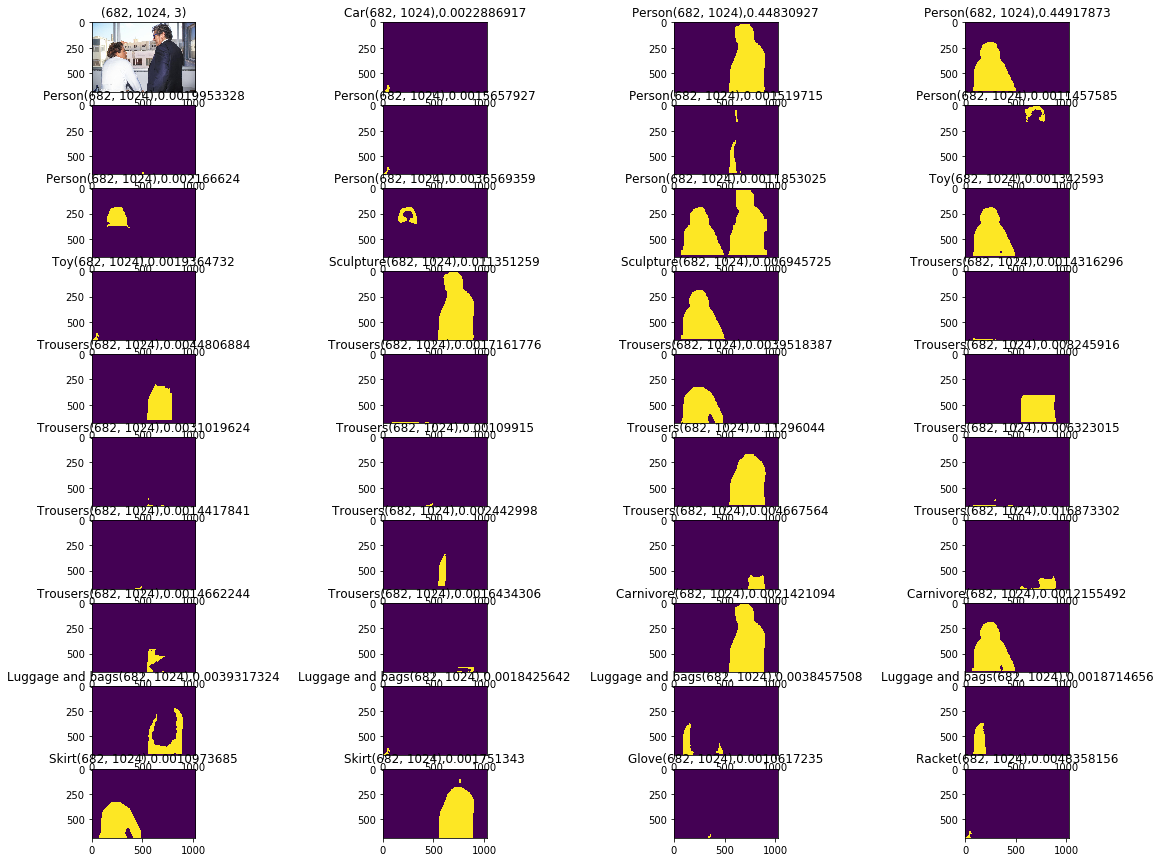

In [27]:
show_pred(3)

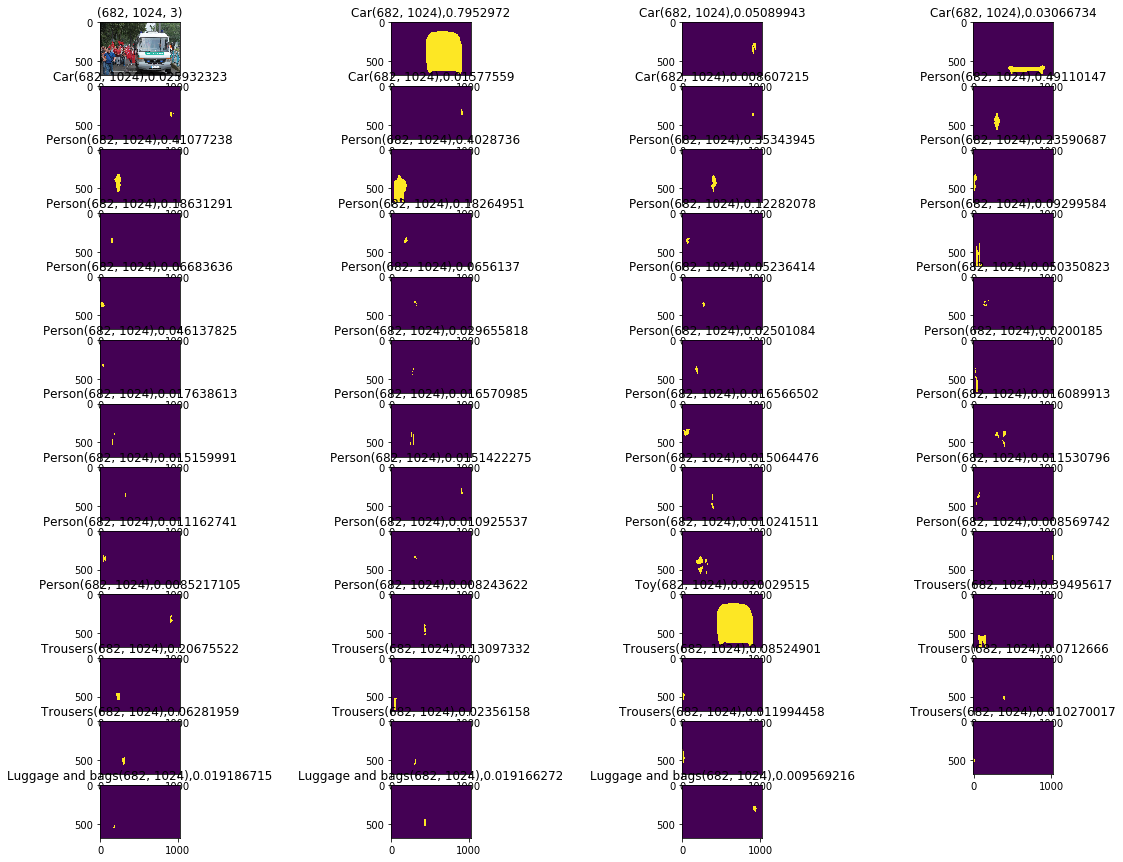

In [28]:
show_pred(999)

In [59]:
import struct
import imghdr

def get_image_size(fname):
    '''Determine the image type of fhandle and return its size.
    from draco'''
    with open(fname, 'rb') as fhandle:
        head = fhandle.read(24)
        if len(head) != 24:
            raise AssertionError('imghead len != 24')
        if imghdr.what(fname) == 'png':
            check = struct.unpack('>i', head[4:8])[0]
            if check != 0x0d0a1a0a:
                raise AssertionError('png check failed')
            width, height = struct.unpack('>ii', head[16:24])
        elif imghdr.what(fname) == 'gif':
            width, height = struct.unpack('<HH', head[6:10])
        elif imghdr.what(fname) == 'jpeg':
            try:
                fhandle.seek(0) # Read 0xff next
                size = 2
                ftype = 0
                while not 0xc0 <= ftype <= 0xcf:
                    fhandle.seek(size, 1)
                    byte = fhandle.read(1)
                    while ord(byte) == 0xff:
                        byte = fhandle.read(1)
                    ftype = ord(byte)
                    size = struct.unpack('>H', fhandle.read(2))[0] - 2
                # We are at a SOFn block
                fhandle.seek(1, 1)  # Skip `precision' byte.
                height, width = struct.unpack('>HH', fhandle.read(4))
            except Exception: #IGNORE:W0703
                raise
        else:
            print(fname, imghdr.what(fname))
            #raise AssertionError('file format not supported')
            img = cv2.imread(fname)
            print(img.shape)
            height, width, _ = img.shape

        return width, height


# create submission

In [60]:
def get_fn(img_id):
    return TEST_IMG_DIR + '/' + img_id + '.jpg'

In [61]:
df_test = df_test.iloc[:5000]

In [62]:
df_test.ImageWidth = df_test.ImageID.map(lambda x: get_image_size(get_fn(x))[0])

In [63]:
df_test.ImageHeight = df_test.ImageID.map(lambda x: get_image_size(get_fn(x))[1])

In [64]:
df_test.head()

,ImageID,ImageWidth,ImageHeight,PredictionString
0,80155d58d0ee19bd,1024,683,NaN
1,52a76f3fe21185bf,1024,683,NaN
2,65e9da7c04c8e4cd,1024,682,NaN
3,6d10fa21d93bd6cc,1024,682,NaN
4,0841dee573a875ca,1024,683,NaN


In [65]:
df_test['img_index'] = df_test.index
df_test.head()

,ImageID,ImageWidth,ImageHeight,PredictionString,img_index
0,80155d58d0ee19bd,1024,683,NaN,0
1,52a76f3fe21185bf,1024,683,NaN,1
2,65e9da7c04c8e4cd,1024,682,NaN,2
3,6d10fa21d93bd6cc,1024,682,NaN,3
4,0841dee573a875ca,1024,683,NaN,4


In [66]:
import base64
import numpy as np
from pycocotools import _mask as coco_mask
import typing as t
import zlib
def encode_binary_mask(mask: np.ndarray) -> t.Text:
    """Converts a binary mask into OID challenge encoding ascii text."""

    # check input mask --
    if mask.dtype != np.bool:
        raise ValueError("encode_binary_mask expects a binary mask, received dtype == %s" % mask.dtype)

    mask = np.squeeze(mask)
    if len(mask.shape) != 2:
        raise ValueError("encode_binary_mask expects a 2d mask, received shape == %s" % mask.shape)
    # convert input mask to expected COCO API input --
    mask_to_encode = mask.reshape(mask.shape[0], mask.shape[1], 1)
    mask_to_encode = mask_to_encode.astype(np.uint8)
    mask_to_encode = np.asfortranarray(mask_to_encode)

    # RLE encode mask --
    encoded_mask = coco_mask.encode(mask_to_encode)[0]["counts"]

    # compress and base64 encoding --
    binary_str = zlib.compress(encoded_mask, zlib.Z_BEST_COMPRESSION)
    base64_str = base64.b64encode(binary_str)
    return base64_str.decode('utf-8')
    

In [67]:
encode_binary_mask(mask1>0)

'eNp1Uz1zwyAM/UsSGCdbMyYxiMv1rluTIR26NP9/rD4Ag31Bhwzi6Qkj6ef2CHf8e8Jm0BSnZV7CZV7my/F8PB+uIU4qnnzC7KhJYhvPsPjkeceTEJAEo7hqbadmZ0yGLEjHX5cxI3mSXbEUFlQMgmAFpz5V80BlMgHopmDBdm1dokoMi6xzZVOcMtmNTPheUGKs/4S5lz5y4YT1ZNTvPfXt+3t3eoOVF9lhbKyr/ahnPaOjehNAyKN/W/Ni5N1E2QXtHPa/0oJbQrp0wZDc9971oVff5leKpC8WK6+S0vIdokPlcsllK9GGy65qmpKP3AjLlKQoBNuSTeKnVhYf/YYBrCXERi5KuzDXd36dfq9fH5/hCWwJpTGglpm2l9cGYy1tV9prHLf7K/wDnx7fuA=='

In [68]:
def get_pred_str(idx):
    masks, labels, confs = get_mask(idx)
    res = []
    for mask, label, conf in zip(masks, labels, confs):
        res.append(label)
        res.append('{:.7f}'.format(conf))
        res.append(encode_binary_mask(mask.astype(np.bool)))
    
    return ' '.join(res)

In [69]:
def set_pred_str(df):
    df['PredictionString'] = df.img_index.map(lambda x: get_pred_str(x))
    return df

In [70]:
from multiprocessing import Pool

def parallel_apply(df, func, n_cores=24):
    #ncores = 24
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df


In [71]:
df_test = parallel_apply(df_test, set_pred_str)

In [72]:
df_test.head()

,ImageID,ImageWidth,ImageHeight,PredictionString,img_index
0,80155d58d0ee19bd,1024,683,/m/0k4j 0.0104179 eNptUzlywzAM/BJPyVWKVJZ4IL0n...,0
1,52a76f3fe21185bf,1024,683,/m/0k4j 0.0147562 eNqLiA+1zDWISzFAAEN/Q38QCWEb...,1
2,65e9da7c04c8e4cd,1024,682,/m/01g317 0.0011316 eNqFFGt3mjD0L92EiJu6dq3tPJ...,2
3,6d10fa21d93bd6cc,1024,682,/m/0k4j 0.0022887 eNp1jM0OgkAMhF9p+BU9yMELmLXV...,3
4,0841dee573a875ca,1024,683,/m/0k4j 0.0743647 eNqtkdsOgjAMhl+pFOXC6JU3Bh0V...,4


In [73]:
df_sub = pd.read_csv(osp.join(DATA_DIR, 'sample_empty_submission.csv'))
df_sub.head()

,ImageID,ImageWidth,ImageHeight,PredictionString
0,80155d58d0ee19bd,-1,-1,NaN
1,52a76f3fe21185bf,-1,-1,NaN
2,65e9da7c04c8e4cd,-1,-1,NaN
3,6d10fa21d93bd6cc,-1,-1,NaN
4,0841dee573a875ca,-1,-1,NaN


In [74]:
df_test = df_test.drop(columns=['img_index'], axis=1)
df_test.head()

,ImageID,ImageWidth,ImageHeight,PredictionString
0,80155d58d0ee19bd,1024,683,/m/0k4j 0.0104179 eNptUzlywzAM/BJPyVWKVJZ4IL0n...
1,52a76f3fe21185bf,1024,683,/m/0k4j 0.0147562 eNqLiA+1zDWISzFAAEN/Q38QCWEb...
2,65e9da7c04c8e4cd,1024,682,/m/01g317 0.0011316 eNqFFGt3mjD0L92EiJu6dq3tPJ...
3,6d10fa21d93bd6cc,1024,682,/m/0k4j 0.0022887 eNp1jM0OgkAMhF9p+BU9yMELmLXV...
4,0841dee573a875ca,1024,683,/m/0k4j 0.0743647 eNqtkdsOgjAMhl+pFOXC6JU3Bh0V...


In [75]:
df_sub = df_sub.iloc[5000:]

In [76]:
df_sub = pd.concat([df_test, df_sub], axis=0)
df_sub.shape

(99999, 4)

In [77]:
df_sub.head()

,ImageID,ImageWidth,ImageHeight,PredictionString
0,80155d58d0ee19bd,1024,683,/m/0k4j 0.0104179 eNptUzlywzAM/BJPyVWKVJZ4IL0n...
1,52a76f3fe21185bf,1024,683,/m/0k4j 0.0147562 eNqLiA+1zDWISzFAAEN/Q38QCWEb...
2,65e9da7c04c8e4cd,1024,682,/m/01g317 0.0011316 eNqFFGt3mjD0L92EiJu6dq3tPJ...
3,6d10fa21d93bd6cc,1024,682,/m/0k4j 0.0022887 eNp1jM0OgkAMhF9p+BU9yMELmLXV...
4,0841dee573a875ca,1024,683,/m/0k4j 0.0743647 eNqtkdsOgjAMhl+pFOXC6JU3Bh0V...


In [78]:
df_sub.to_csv('sub_parent_5000_0905.csv', index=False)

In [79]:
!kaggle competitions submit -c open-images-2019-instance-segmentation -f sub_parent_5000_0905.csv -m "parent classes 5000 test"

100%|██████████████████████████████████████| 80.6M/80.6M [00:01<00:00, 46.8MB/s]
Successfully submitted to Open Images 2019 - Instance Segmentation

In [160]:
!ls -lh

total 21G
-rw-rw-r-- 1 core core 5.3K Aug  8 17:40 challenge-2019-classes-description-segmentable.csv
-rw-rw-r-- 1 core core  21K Jul 26 08:26 challenge-2019-label300-segmentable-hierarchy.json
-rw-rw-r-- 1 core core 369M Aug  8 17:46 challenge-2019-train-segmentation-bbox.csv
-rw-rw-r-- 1 core core  82M Aug  8 17:47 challenge-2019-train-segmentation-labels.csv
-rw-rw-r-- 1 core core 613M Aug  8 18:03 challenge-2019-train-segmentation-masks.csv
-rw-rw-r-- 1 core core 6.4M Aug  8 18:03 challenge-2019-validation-segmentation-bbox.csv
-rw-rw-r-- 1 core core 2.4M Aug  8 18:03 challenge-2019-validation-segmentation-labels.csv
-rw-rw-r-- 1 core core 2.7M Aug  8 18:03 challenge-2019-validation-segmentation-masks.csv
-rw-rw-r-- 1 core core 453K Aug 31 17:05 check_preds.ipynb
-rw-r--r-- 1 core core 369K Aug 31 16:49 eda.ipynb
-rw-rw-r-- 1 core core 9.7G Jul 26 08:32 open-images-2019-instance-segmentation.zip
-rw-rw---- 1 core core 2.3M Jul  9 10:50 sample_empty_submission.csv
-rw-rw---- 1 core 